## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


##### Your code here - remember to use markdown cells for comments as well!
#### Doreen Murugi Kahare 
#### Full time Hybrid Data Science (DSF-FT12)
#### 29/03/2025
#### SAMUEL KARU

#### INTRODUCTION
##### My company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. I am charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. 

##### Objectives
##### 1. Translate findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.
##### 2. Deal with missing values, aggregate the data, and to visualize it in an interactive dashboard.

### 1. DATA MINING (Loading and Eploring Data)

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [50]:
df = pd.read_csv("./data/Aviation_Data.csv")
df.head()# shows top five rows of the data

c:\Users\User\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


### 2. DATA PREPARATION

In [51]:
# shape of data
df.shape

(90348, 31)

In [52]:
# check for general information about the data(datatypes, missing values)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

#### The dataset contains 90,348 rows and 31, the data includes various attributes such as accident details, aircraft specifications, flight purpose, and casualty numbers.

#### The dataset consists of both categorical and numerical columns. Categorical data includes columns like Investigation.Type, which indicates whether the event was an accident or an incident, Aircraft.Category, which classifies the aircraft type, and Weather.Condition, which describes the weather at the time of the event. Numerical fields include Total.Fatal.Injuries, Total.Serious.Injuries, and Total.Minor.Injuries, which record the number of casualties.

#### With a significant number of missing values.

In [53]:
# statistics summary
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


### The dataset contains 82,805 records for the number of engines. Most aircraft are single-engine, with an average of 1.15 engines and a maximum of 8. 

### Fatal injuries are recorded in 77,488 cases, with an average of 0.65 fatalities per accident. However, the high standard deviation 5.49 indicates that while most accidents have no fatalities, some are severe, with a maximum of 349 deaths in a single incident.

### Serious injuries are documented in 76,379 cases, with an average of 0.28 per accident. The majority of incidents result in no serious injuries, as seen in the median value of 0. However, some crashes have resulted in up to max of 161 serious injuries.

### Minor injuries appear in 76,956 records, with an average of 0.36 per accident. While most cases show no minor injuries, some incidents have reported as many as 380 minor injuries, likely in large-capacity aircraft.

### Uninjured individuals are recorded in 82,977 cases, with an average of 5.33 uninjured passengers per accident. 

### 3. DATA CLEANING

In [54]:
# check for duplicate values
df.duplicated().value_counts()

False    88958
True      1390
dtype: int64

In [55]:
#view duplicates
df[df.duplicated()]

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
64050,NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64052,NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64388,NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64541,NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64552,NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89956,NaN,15-12-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90004,NaN,15-12-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90010,NaN,15-12-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90031,NaN,15-12-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
# removing duplicates
df = df.drop_duplicates()
# verify duplicates have been removed
df.duplicated().value_counts()

False    88958
dtype: int64

In [57]:
# check for null values
df.isna().sum()

Event.Id                     69
Investigation.Type            0
Accident.Number              69
Event.Date                   69
Location                    121
Country                     295
Latitude                  54576
Longitude                 54585
Airport.Code              38709
Airport.Name              36168
Injury.Severity            1069
Aircraft.damage            3263
Aircraft.Category         56671
Registration.Number        1386
Make                        132
Model                       161
Amateur.Built               171
Number.of.Engines          6153
Engine.Type                7146
FAR.Description           56935
Schedule                  76376
Purpose.of.flight          6261
Air.carrier               72310
Total.Fatal.Injuries      11470
Total.Serious.Injuries    12579
Total.Minor.Injuries      12002
Total.Uninjured            5981
Weather.Condition          4561
Broad.phase.of.flight     27234
Report.Status              6450
Publication.Date          15299
dtype: i

In [58]:
# dropping rows
df = df.dropna(subset=["Event.Id", "Accident.Number","Event.Date", "Registration.Number", "Location"])  
df.isna().sum()


Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      0
Country                     220
Latitude                  53549
Longitude                 53558
Airport.Code              37365
Airport.Name              34836
Injury.Severity             977
Aircraft.damage            3009
Aircraft.Category         55530
Registration.Number           0
Make                         25
Model                        54
Amateur.Built                32
Number.of.Engines          4854
Engine.Type                6161
FAR.Description           55827
Schedule                  75825
Purpose.of.flight          5615
Air.carrier               70923
Total.Fatal.Injuries      10863
Total.Serious.Injuries    11640
Total.Minor.Injuries      10995
Total.Uninjured            5162
Weather.Condition          4091
Broad.phase.of.flight     25865
Report.Status              6349
Publication.Date          14998
dtype: i

In [59]:
# dropping columns
df = df.drop(["Air.carrier", "Schedule", "Publication.Date", "Country", "FAR.Description", "Airport.Name", "Airport.Code"], axis=1)


In [60]:
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      0
Latitude                  53549
Longitude                 53558
Injury.Severity             977
Aircraft.damage            3009
Aircraft.Category         55530
Registration.Number           0
Make                         25
Model                        54
Amateur.Built                32
Number.of.Engines          4854
Engine.Type                6161
Purpose.of.flight          5615
Total.Fatal.Injuries      10863
Total.Serious.Injuries    11640
Total.Minor.Injuries      10995
Total.Uninjured            5162
Weather.Condition          4091
Broad.phase.of.flight     25865
Report.Status              6349
dtype: int64

In [61]:
# replacing with reassignment 
# quantitative data
df["Total.Fatal.Injuries"] = df["Total.Fatal.Injuries"].fillna(df["Total.Fatal.Injuries"].median())
df["Total.Serious.Injuries"] = df["Total.Serious.Injuries"].fillna(df["Total.Serious.Injuries"].median())
df["Total.Minor.Injuries"] = df["Total.Minor.Injuries"].fillna(df["Total.Minor.Injuries"].median())
df["Total.Uninjured"] = df["Total.Uninjured"].fillna(df["Total.Uninjured"].median())
df["Number.of.Engines"] = df["Number.of.Engines"].fillna(df["Number.of.Engines"].median())


In [62]:
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      0
Latitude                  53549
Longitude                 53558
Injury.Severity             977
Aircraft.damage            3009
Aircraft.Category         55530
Registration.Number           0
Make                         25
Model                        54
Amateur.Built                32
Number.of.Engines             0
Engine.Type                6161
Purpose.of.flight          5615
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition          4091
Broad.phase.of.flight     25865
Report.Status              6349
dtype: int64

In [63]:
# categorical data
df["Longitude"] = df["Longitude"].fillna("Unknown")
df["Latitude"] = df["Latitude"].fillna("Unknown")
df["Amateur.Built"] = df["Amateur.Built"].fillna("Unknown")
df["Make"] = df["Make"].fillna("Unknown")
df["Model"] = df["Model"].fillna("Unknown")
df["Report.Status"] = df["Report.Status"].fillna("Probable Cause")
df["Broad.phase.of.flight"] = df["Broad.phase.of.flight"].fillna("Unknown")
df["Weather.Condition"] = df["Weather.Condition"].fillna("Unknown")
df["Amateur.Built"] = df["Amateur.Built"].fillna("Unknown")
df["Purpose.of.flight"] = df["Purpose.of.flight"].fillna("Unknown")
df["Engine.Type"] = df["Engine.Type"].fillna("Unknown")
df["Amateur.Built"] = df["Amateur.Built"].fillna("Unknown")
df["Injury.Severity"] = df["Injury.Severity"].fillna("Unknown")
df["Aircraft.Category"] = df["Aircraft.Category"].fillna("Unknown")
df["Aircraft.damage"] = df["Aircraft.damage"].fillna("Unknown")



In [64]:
# recheck for missing values
df.isna().sum()

Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Latitude                  0
Longitude                 0
Injury.Severity           0
Aircraft.damage           0
Aircraft.Category         0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Report.Status             0
dtype: int64

### 4. DATA ANALYSIS & VISUALIZATION

In [65]:
# Total number of injuries
df['Total.Injuries'] = df['Total.Fatal.Injuries'] + df['Total.Serious.Injuries'] + df['Total.Minor.Injuries']
print(df['Total.Injuries'])


0        2.0
1        4.0
2        3.0
3        2.0
4        3.0
        ... 
90343    1.0
90344    0.0
90345    0.0
90346    0.0
90347    1.0
Name: Total.Injuries, Length: 87542, dtype: float64


In [66]:
# accidents by aircraft type count
aircraft_accidents = df.groupby('Aircraft.Category')['Accident.Number'].count().reset_index()


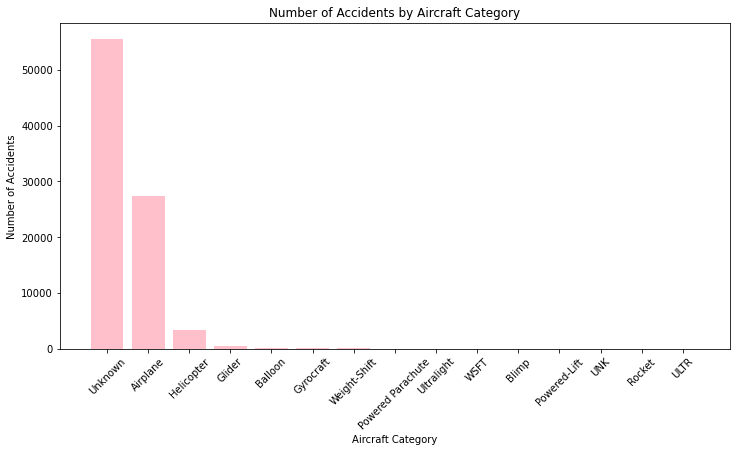

In [67]:

# Sort values for better visualization
aircraft_accidents = aircraft_accidents.sort_values(by='Accident.Number', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
plt.bar(aircraft_accidents['Aircraft.Category'], aircraft_accidents['Accident.Number'], color='pink')
plt.xticks(rotation=45)
plt.xlabel("Aircraft Category")
plt.ylabel("Number of Accidents")
plt.title("Number of Accidents by Aircraft Category")
plt.show()


#### The bar chart displays the distribution of aircraft accidents based on the number of accidents. 

#### The steep decline in occurrences as the number of engines increases suggests that smaller planes are more prone to accidents, likely due to higher usage, operational risks, or structural limitations.

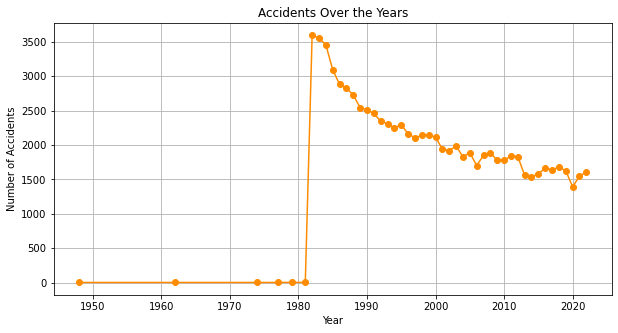

In [68]:
# Accidents over the years
df['Year'] = pd.to_datetime(df['Event.Date']).dt.year  # Extract year
accident_trends = df.groupby('Year')['Registration.Number'].count()

#Plot
plt.figure(figsize=(10, 5))
plt.plot(accident_trends.index, accident_trends.values, marker='o', linestyle='-', color='darkorange')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Accidents Over the Years')
plt.grid()
plt.show()

#### The line graph shows a sharp increase at a specific point, indicating a sudden spike in the measured variable. After the peak, there is a gradual decline, suggesting an adjustment over time. However, the trend does not return to its initial state, implying a lasting impact from the spike.

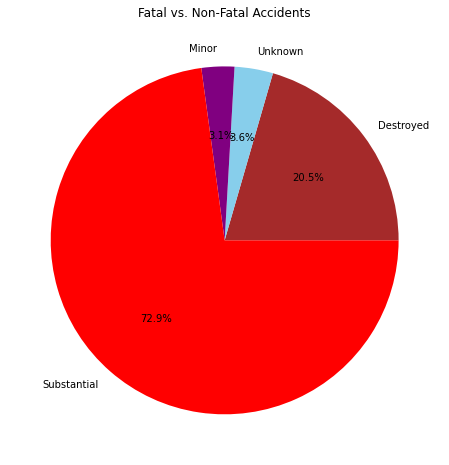

In [69]:
# Aircraft damage comparision
completely_destroyed = df[df['Aircraft.damage'] == 'Destroyed'].shape[0]
unknown_damage = df[df['Aircraft.damage'] == 'Unknown'].shape[0]
minor_damage = df[df['Aircraft.damage'] == 'Minor'].shape[0]
substantial_damage = df[df['Aircraft.damage'] == 'Substantial'].shape[0]

# Plot
plt.figure(figsize=(8, 8))
plt.pie([completely_destroyed, unknown_damage, minor_damage, substantial_damage], labels=['Destroyed', 'Unknown', 'Minor', 'Substantial'], autopct='%1.1f%%', colors=['brown', 'skyblue','purple','red'])
plt.title('Fatal vs. Non-Fatal Accidents')
plt.show()

#### The pie chart represents the distribution of different categories, with the largest segment (72.9%) dominating the dataset, shown in bright red. This suggests that a single factor overwhelmingly contributes to the total.

#### The second-largest category accounts for 20.5%, while the remaining segments make up only small fractions (3.6%, 3.1%), indicating a highly imbalanced distribution. The smallest segments could represent minor contributing factors or outliers in the data.

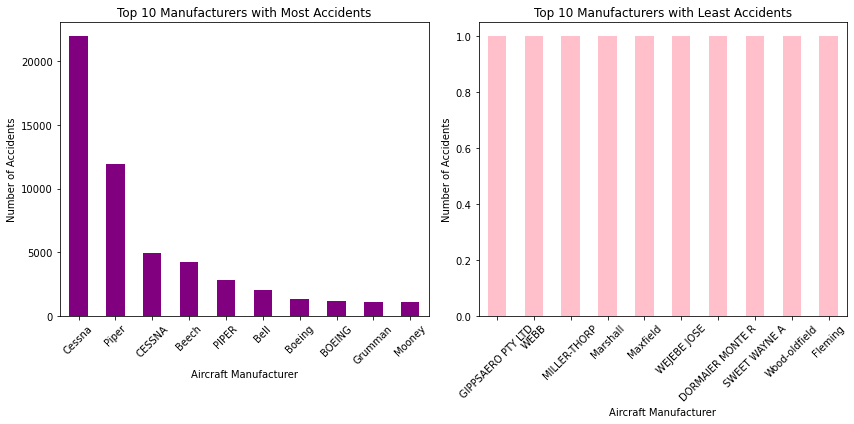

In [70]:
# Get top 10 manufacturers with most accidents
top_manufacturers = df['Make'].value_counts().nlargest(10)

# Get bottom 10 manufacturers with least accidents
least_manufacturers = df['Make'].value_counts().nsmallest(10)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot top 10 manufacturers with most accidents
top_manufacturers.plot(kind='bar', color='purple', ax=axes[0])
axes[0].set_xlabel('Aircraft Manufacturer')
axes[0].set_ylabel('Number of Accidents')
axes[0].set_title('Top 10 Manufacturers with Most Accidents')
axes[0].tick_params(axis='x', rotation=45)

# Plot top 10 manufacturers with least accidents
least_manufacturers.plot(kind='bar', color='pink', ax=axes[1])
axes[1].set_xlabel('Aircraft Manufacturer')
axes[1].set_ylabel('Number of Accidents')
axes[1].set_title('Top 10 Manufacturers with Least Accidents')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


#### The left bar chart shows a right-skewed distribution, where the highest frequency is concentrated in the first few categories, and the values gradually decline. This suggests that most occurrences are within a few key groups, while the rest have significantly lower frequencies.

#### The right bar chart displays a uniform distribution, where all bars are of almost equal height. This indicates that each category has a similar frequency, implying a balanced dataset with no dominant category.

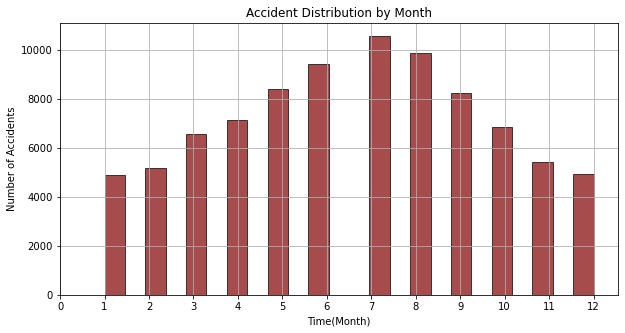

In [71]:
# Accidents per Month
df['Month'] = pd.to_datetime(df['Event.Date'], errors='coerce').dt.month  # Extract month from time

#Plot
plt.figure(figsize=(10, 5))
plt.hist(df['Month'].dropna(), bins=24, color='maroon', edgecolor='black', alpha=0.7)
plt.xlabel('Time(Month)')
plt.ylabel('Number of Accidents')
plt.title('Accident Distribution by Month')
plt.xticks(range(0, 13))
plt.grid()
plt.show()

#### The bar chart shows a symmetrical distribution with values increasing towards the center and then decreasing, resembling a bell-shaped pattern. This suggests a normal or near-normal distribution in the dataset.


In [72]:
# Converting to csv file
df.to_csv('Aviation_Modified.csv', index= False)